In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from big_numbers import contract_18_decimals_to_float

In [52]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

In [53]:
master_trader_df = pd.read_csv("master_trader.csv")
master_trader_df.drop(columns=["Unnamed: 0", "tx_hash"], inplace=True)
master_trader_df["time"] = pd.to_datetime(master_trader_df["timestamp"], unit='s')
master_trader_df

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,mark_twap,index_twap,daily_funding_rate,deposit,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54295.708000,55072.675000,-0.014108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4104.856899,4167.914502,-0.015129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54295.708000,55072.675000,-0.014108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522802,0x66465ad392942e78f8147ae565a43f174071822b,-63.016538,1007.767544,1.007768,77543.167127,0.0,-4785.063498,15.992112,16.205254,15.968758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522803,0x31789f360b9aab20837a35944904deb540533357,-5.821204,1250.535778,1.250536,28511.176773,0.0,-132.045808,214.824254,215.918833,214.596023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522804,0xdab8a2e0b213ec8447d4f7cdb783d53ed3428b7a,-3419.000000,806.897384,0.806897,806.090487,0.0,-3419.000000,0.236004,0.235768,0.235708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522805,0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca,-1220.524515,750.778051,0.750778,74113.308142,0.0,-122785.420591,0.615127,0.603600,0.614201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
master_trader_df.columns

Index(['trader', 'exchanged_position_size', 'exchanged_position_notional',
       'fee', 'open_notional', 'realized_pnl', 'position_size_after',
       'swapped_price', 'entry_price_after', 'market_price_after',
       'block_number_log_index', 'timestamp', 'time', 'pool_name',
       'funding_payment', 'mark_twap', 'index_twap', 'daily_funding_rate',
       'deposit', 'withdraw', 'liquidator', 'liquidation_fee',
       'position_size_abs', 'position_notional_abs', 'block_number'],
      dtype='object')

In [55]:
grouped_master_trader_df = master_trader_df[["trader", "fee", "realized_pnl", "funding_payment",
                   "liquidation_fee", "deposit", "withdraw"]].groupby("trader").sum()
grouped_master_trader_df

,fee,realized_pnl,funding_payment,liquidation_fee,deposit,withdraw
trader,,,,,,
0x000000000a38444e0a6e37d3b630d7e855a7cb13,14.926458,110.081082,0.0,0.0,751.479445,864.017511
0x00004bbaaa33277a699146f220c2edc01ae96501,2658.818346,-87726.357419,0.0,0.0,52259.257174,15695.766788
0x0002f3d64dbcd2c03af45e4ca6fd4428b830b01e,0.000000,0.000000,0.0,0.0,500.000000,0.000000
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54,5.017490,-5.017490,0.0,0.0,570.751230,565.733740
0x000872be5ec7dc8197ef6618ef507d9a449cac1a,0.227951,-0.162458,0.0,0.0,12.000000,11.837032
...,...,...,...,...,...,...
0xffdf4eb71c453bebc5e2672d70c1330164683071,102.002098,-129.905702,0.0,0.0,222.854245,92.949519
0xffeb037c74faf4466edd9554d4e281b93ab2ff26,0.240381,0.260457,0.0,0.0,15.000000,15.235789
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7,7.597076,-6.721402,0.0,0.0,219.100958,212.379557


In [56]:
grouped_master_trader_df.columns

Index(['fee', 'realized_pnl', 'funding_payment', 'liquidation_fee', 'deposit',
       'withdraw'],
      dtype='object')

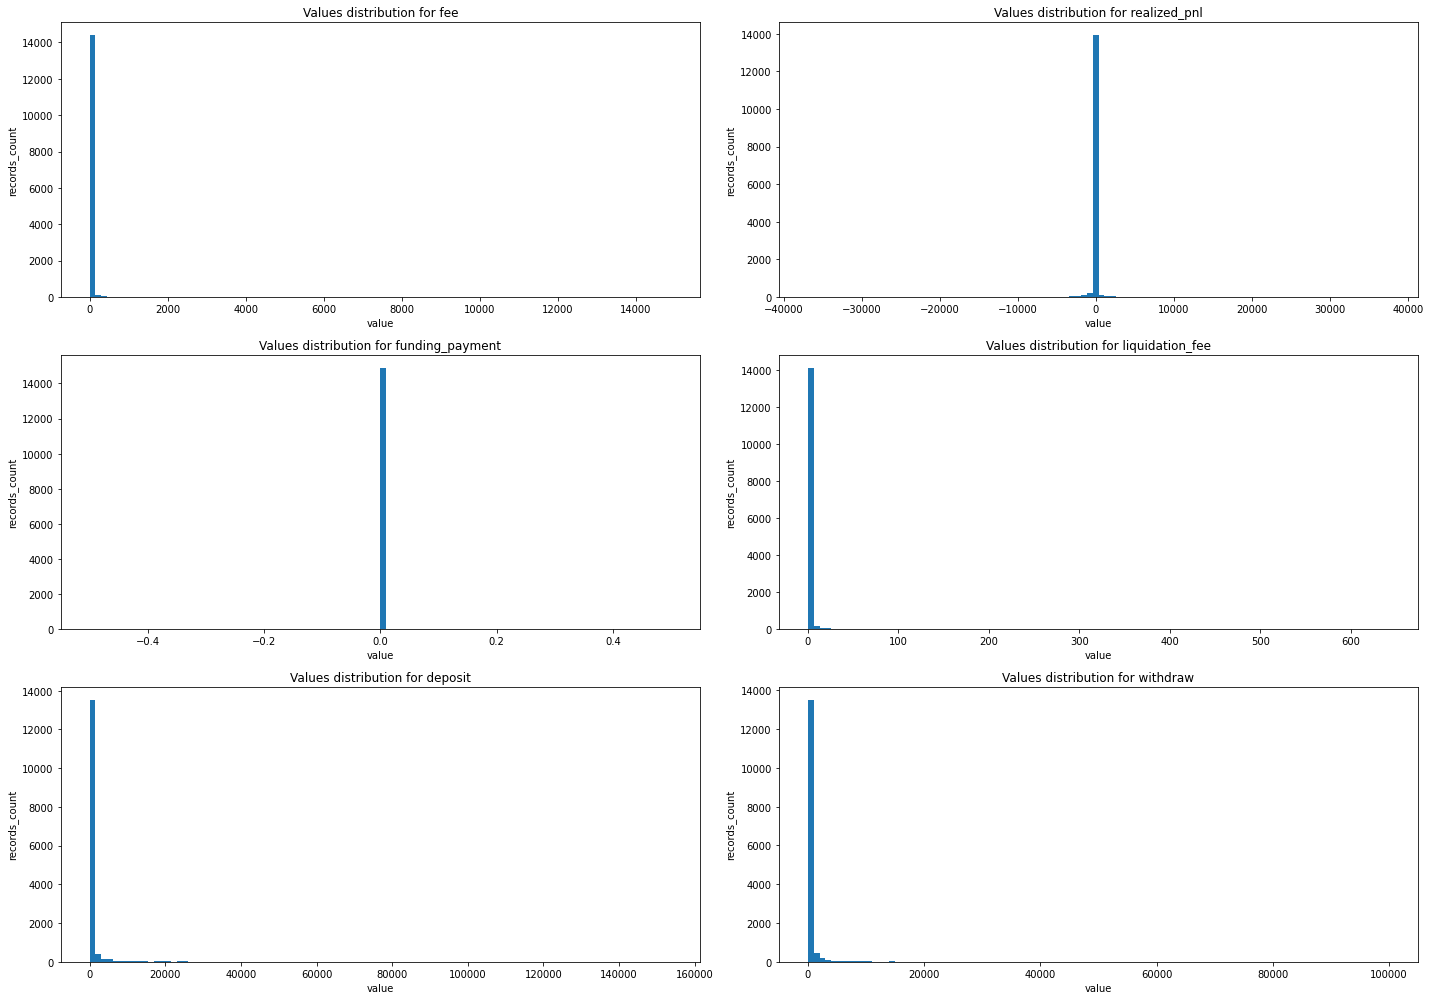

In [57]:
fig = plt.figure(figsize=(20, 14))
plot_index = 1

for column in grouped_master_trader_df.columns:
    ax = fig.add_subplot(3, 2, plot_index)
    
    median = grouped_master_trader_df[column].median()
    std = grouped_master_trader_df[column].std()
    
    ax.hist(grouped_master_trader_df[(grouped_master_trader_df[column] >= (median - 1 * std)) &
                                     (grouped_master_trader_df[column] <= (median + 1 * std))][column], bins=100)
    ax.set_xlabel("value")
    ax.set_ylabel("records_count")
    ax.set_title("Values distribution for " + column)
    plot_index += 1
    
fig.tight_layout()
plt.show()

# Check of "master" for one table

Considering that "master" table is useful for constructing a complete overview of the activity it would be great to check this for one trader

In [58]:
master_trader_df

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,mark_twap,index_twap,daily_funding_rate,deposit,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54295.708000,55072.675000,-0.014108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4104.856899,4167.914502,-0.015129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54295.708000,55072.675000,-0.014108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522802,0x66465ad392942e78f8147ae565a43f174071822b,-63.016538,1007.767544,1.007768,77543.167127,0.0,-4785.063498,15.992112,16.205254,15.968758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522803,0x31789f360b9aab20837a35944904deb540533357,-5.821204,1250.535778,1.250536,28511.176773,0.0,-132.045808,214.824254,215.918833,214.596023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522804,0xdab8a2e0b213ec8447d4f7cdb783d53ed3428b7a,-3419.000000,806.897384,0.806897,806.090487,0.0,-3419.000000,0.236004,0.235768,0.235708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522805,0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca,-1220.524515,750.778051,0.750778,74113.308142,0.0,-122785.420591,0.615127,0.603600,0.614201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conform flow can be seen that there are used deposits to perform initial investment of the money to the platform after which trader is able to start performing position changes, manipulations and so on.

In [59]:
grouped_master_trader_df["extracted_balance"] = (grouped_master_trader_df["withdraw"] - 
                                                 grouped_master_trader_df["deposit"])
grouped_master_trader_df

,fee,realized_pnl,funding_payment,liquidation_fee,deposit,withdraw,extracted_balance
trader,,,,,,,
0x000000000a38444e0a6e37d3b630d7e855a7cb13,14.926458,110.081082,0.0,0.0,751.479445,864.017511,112.538066
0x00004bbaaa33277a699146f220c2edc01ae96501,2658.818346,-87726.357419,0.0,0.0,52259.257174,15695.766788,-36563.490386
0x0002f3d64dbcd2c03af45e4ca6fd4428b830b01e,0.000000,0.000000,0.0,0.0,500.000000,0.000000,-500.000000
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54,5.017490,-5.017490,0.0,0.0,570.751230,565.733740,-5.017490
0x000872be5ec7dc8197ef6618ef507d9a449cac1a,0.227951,-0.162458,0.0,0.0,12.000000,11.837032,-0.162968
...,...,...,...,...,...,...,...
0xffdf4eb71c453bebc5e2672d70c1330164683071,102.002098,-129.905702,0.0,0.0,222.854245,92.949519,-129.904726
0xffeb037c74faf4466edd9554d4e281b93ab2ff26,0.240381,0.260457,0.0,0.0,15.000000,15.235789,0.235789
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7,7.597076,-6.721402,0.0,0.0,219.100958,212.379557,-6.721401


In [60]:
grouped_master_trader_df.sort_values("realized_pnl")

,fee,realized_pnl,funding_payment,liquidation_fee,deposit,withdraw,extracted_balance
trader,,,,,,,
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1.153764e+06,-3.387945e+06,0.0,0.0,9.000000e+06,7.527842e+06,-1.472158e+06
0xf8489bcef22d3282bb884b9e9cc708bb465c075e,4.581778e+05,-1.466126e+06,0.0,0.0,3.150000e+06,2.766601e+06,-3.833988e+05
0xafa64cca337efee0ad827f6c2684e69275226e90,5.159370e+03,-1.399139e+06,0.0,0.0,8.750000e+06,7.560731e+06,-1.189269e+06
0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226,7.122881e+04,-9.380727e+05,0.0,0.0,9.935280e+05,2.370000e+05,-7.565280e+05
0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd,1.057094e+05,-9.084698e+05,0.0,0.0,1.736319e+06,1.055000e+06,-6.813193e+05
...,...,...,...,...,...,...,...
0x6541e4d0f50a82544401b1e0721626415a37de99,1.692530e+05,3.529292e+05,0.0,0.0,1.498930e+05,5.041326e+05,3.542396e+05
0x8a7cd6f15877a49f91189d311f026eb929228448,2.015289e+05,3.560584e+05,0.0,0.0,1.537300e+05,5.278591e+05,3.741292e+05
0x3205dbab7b8d704ed05bc72234178d61058c10ca,6.625673e+04,3.586840e+05,0.0,0.0,3.233402e+04,3.183726e+05,2.860385e+05


Realized profit and loss already contains calculation of the fee and therefore there is no need also to consider fees required to payment.

In [61]:
master_trader_df[master_trader_df["trader"] == "0x9c1e0c67aa30c063f341885b12cb81cc94613fc7"][:20]

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,mark_twap,index_twap,daily_funding_rate,deposit,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.055178,-2997.0,3.0,-3000.0,0.0,0.055178,54315.297418,54369.667085,54334.893904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.729828,-2997.0,3.0,-3000.0,0.0,0.729828,4106.445744,4110.556300,4108.035203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.055138,-2997.0,3.0,-6000.0,0.0,0.110316,54354.490389,54389.276112,54374.093942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.729264,-2997.0,3.0,-6000.0,0.0,1.459092,4109.624663,4112.146735,4111.214738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.055098,-2997.0,3.0,-9000.0,0.0,0.165414,54393.697496,54408.885139,54413.308117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.728700,-2997.0,3.0,-9000.0,0.0,2.187792,4112.804813,4113.737171,4114.395503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.055059,-2997.0,3.0,-12000.0,0.0,0.220473,54432.918738,54428.494166,54452.536426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.728137,-2997.0,3.0,-12000.0,0.0,2.915928,4115.986193,4115.327606,4117.577498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.055019,-2997.0,3.0,-15000.0,0.0,0.275492,54472.154115,54448.103193,54491.778871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
master_trader_df[master_trader_df["trader"] == "0x6541e4d0f50a82544401b1e0721626415a37de99"][:20]

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,mark_twap,index_twap,daily_funding_rate,deposit,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number
41628,0x6541e4d0f50a82544401b1e0721626415a37de99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8949.804346,NaN,NaN,NaN,NaN,NaN,NaN
41667,0x6541e4d0f50a82544401b1e0721626415a37de99,-1.3150,5002.773250,5.002773,4997.770476,0.000000,-1.3150,3804.390304,3800.585914,3804.131115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41668,0x6541e4d0f50a82544401b1e0721626415a37de99,-1.3150,5002.091629,5.002092,9994.860014,0.000000,-2.6300,3803.871961,3800.327001,3803.612825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41669,0x6541e4d0f50a82544401b1e0721626415a37de99,-1.3160,5005.213241,5.005213,14995.068042,0.000000,-3.9460,3803.353527,3800.067927,3803.094233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41670,0x6541e4d0f50a82544401b1e0721626415a37de99,-1.3160,5004.530767,5.004531,19994.594278,0.000000,-5.2620,3802.834929,3799.808871,3802.575644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41671,0x6541e4d0f50a82544401b1e0721626415a37de99,-1.3160,5003.848374,5.003848,24993.438804,0.000000,-6.5780,3802.316394,3799.549833,3802.057161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41714,0x6541e4d0f50a82544401b1e0721626415a37de99,1.3210,-4994.341693,4.999341,19974.233474,19.864296,-5.2570,3780.728004,3799.549833,3780.986150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41717,0x6541e4d0f50a82544401b1e0721626415a37de99,1.3200,-4991.923433,4.996920,14958.827694,18.485426,-3.9370,3781.760177,3799.549833,3782.018233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41729,0x6541e4d0f50a82544401b1e0721626415a37de99,-1.3200,5004.457223,5.004457,19958.280460,0.000000,-5.2570,3791.255472,3796.515210,3790.996461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41740,0x6541e4d0f50a82544401b1e0721626415a37de99,1.3190,-4992.909523,4.997907,14950.676898,9.696132,-3.9380,3785.374923,3796.515210,3785.633153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Finding amount of money at the moment of time

The first step that each trader performs - investment. He/she invests money to the platform setting it as a margin that can be used for supporting the trades. After this, trader opens a position and each change of the position records collected profits and losses. Therefore, with profit amount of available funds is increasing, while with losses amount of available funds decreases. Another source of income (or losses) is in the funding payments that are used to support traders moving price closer to the real market one.

Aspect of finding money at the moment of time will represent cumulative sum formula with the next look:

***Money at time = deposits + profits + receivable funding payments - losses - paid funding payments - withdraws***

In [63]:
def money_at_time_trader(trader_activity_df: pd.DataFrame, address: str,
                         xsize: int=25, ysize: int=12.5):
    """generate plot with money movement and balance

    Args:
        trader_activity_df (pd.DataFrame): overall trading activity df
        address (str): address of the trader for which activity is analyzed
        xsize (int, optional): length of chart. Defaults to 25.
        ysize (int, optional): height of chart. Defaults to 12.5.
    """
    #   set information only for one specific trader
    trader_df = trader_activity_df[trader_activity_df["trader"] == address]
    trader_df.fillna(0, inplace=True)   #   make sure there are no gaps, because it may cause errors
    trader_df["money_movement"] = (trader_df["deposit"] - trader_df["withdraw"] + 
                                   trader_df["realized_pnl"] - trader_df["funding_payment"])
    trader_df["money_balance"] = trader_df["money_movement"].cumsum()
    
    #   plotting money movement and balance
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    ax.bar(trader_df[trader_df["money_movement"] >= 0]["time"], 
        trader_df[trader_df["money_movement"] >= 0]["money_movement"],
        color='g', label='positive money movement')
    ax.bar(trader_df[trader_df["money_movement"] < 0]["time"], 
        trader_df[trader_df["money_movement"] < 0]["money_movement"],
        color='r', label='negative money movement')
    ax.plot(trader_df["time"], trader_df["money_balance"],
        color='b', label='money balance')
    ax.set_xlabel("time")
    ax.set_ylabel("USD")
    ax.legend()
    ax.grid(True, linestyle='--')
    ax.set_title("Money flow for " + address)
    plt.show()

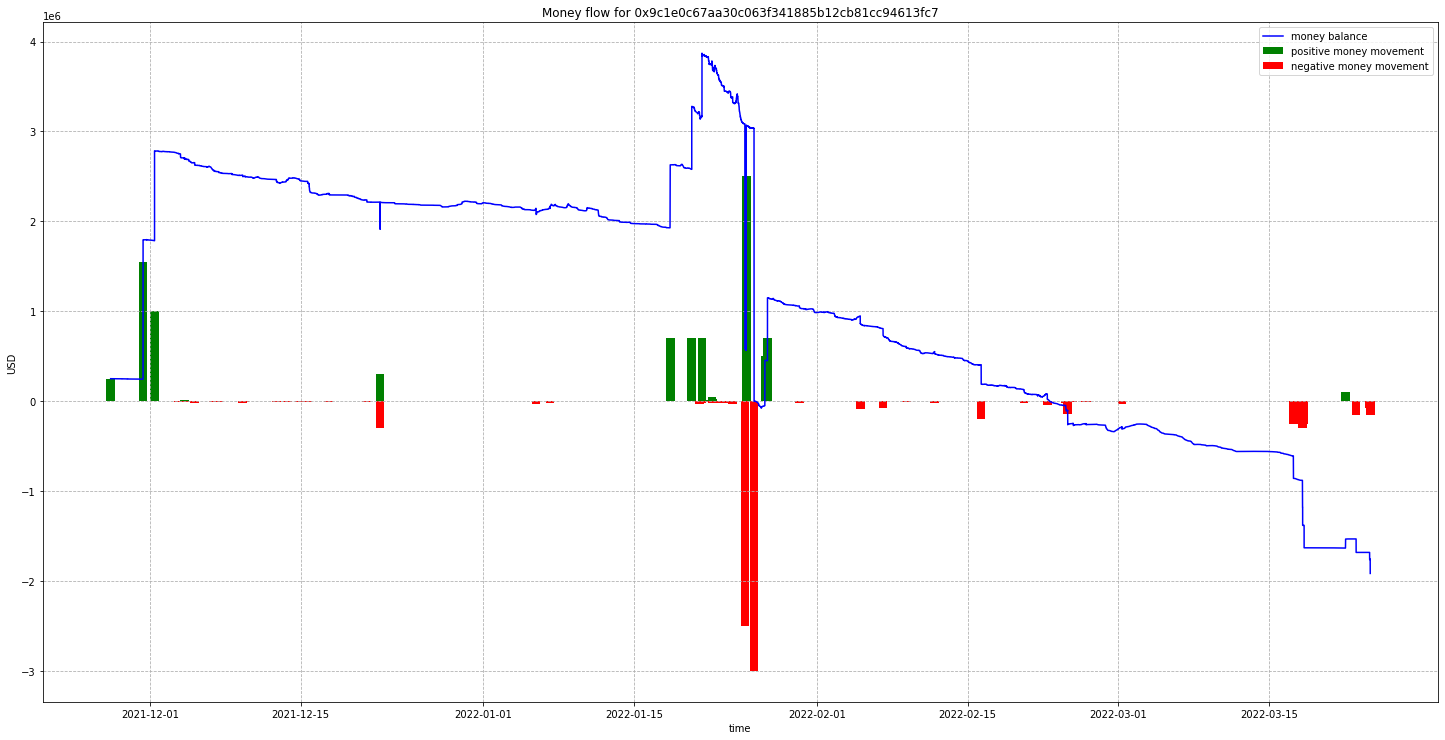

In [64]:
money_at_time_trader(master_trader_df, "0x9c1e0c67aa30c063f341885b12cb81cc94613fc7")

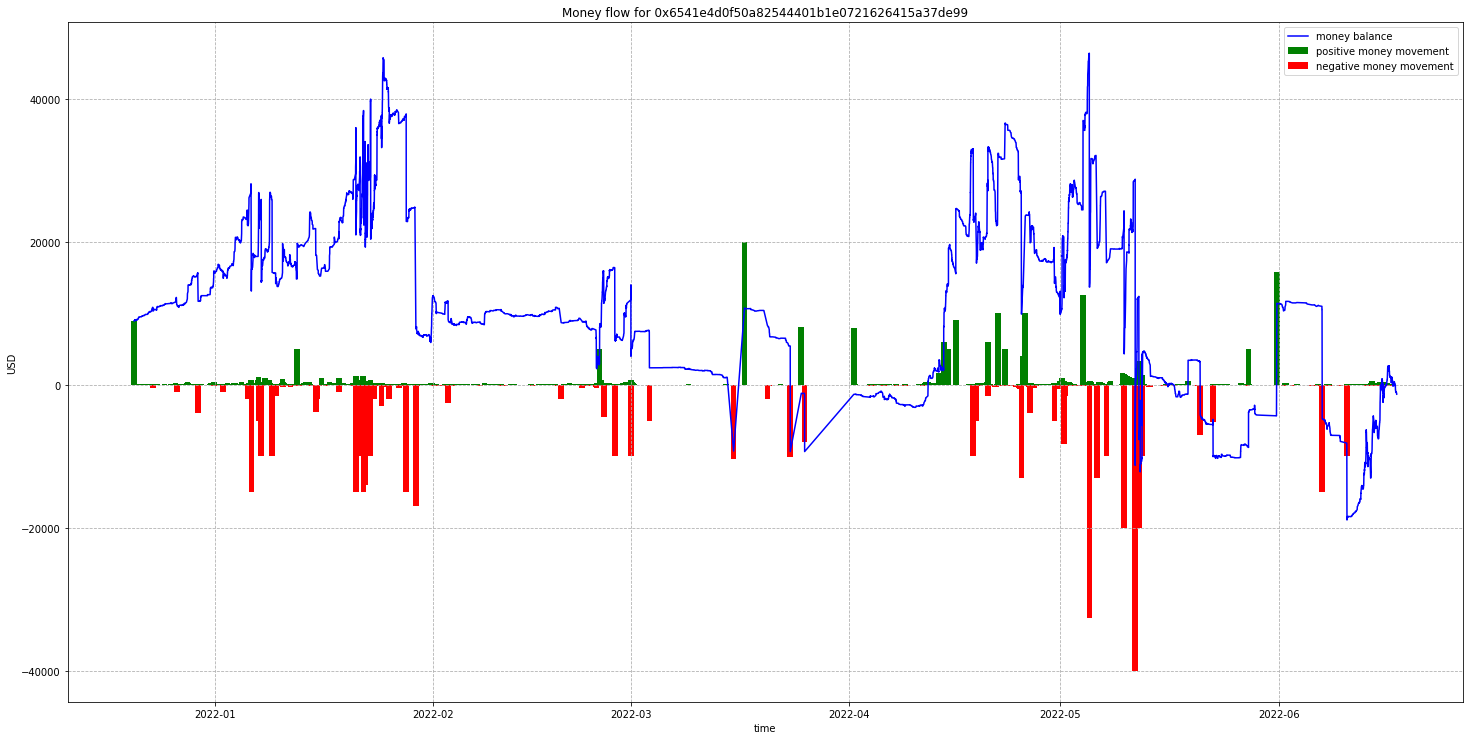

In [65]:
money_at_time_trader(master_trader_df, "0x6541e4d0f50a82544401b1e0721626415a37de99")

# Searching for impermanent loss

Makers provide their liquidity for a specific price interval and they will not receive any fees in case if swaps (position changes) will be performed with price outside of this price interval. Their liquidity will be returned in case if they will request their tokens back.

There are several aspects that can be estimated for the makers:

1. Amount of both tokens required to achieve a specific liquidity value;
2. Impermanent loss, which will be mostly calculated considering provided liquidity. Liquidity is provided by the next schema: ***provided liquidity / (2 * token price)***

The first aspect can be found conform a simple formula:

***Desired numeraire * sqrt(lower price bound) = possible contribution (in numeraire)***

Possible contribution demonstrates a real investment that can be done by the trader to perform its activity considering leverage that can be set. This formula represents amount of numerair tokens that can be used. The same can be done for the "risk" asset using the next formula

***Desired numeraire * sqrt(upper price bound)***

***__________________________________________________ = required risk tokens value***

***      amount respective to numeraire ***

Higher interest represents the second formula and it will be the first one for implementation

In [66]:
liquidity_changes_df = pd.read_csv("liquidity_changes.csv")
liquidity_changes_df["time"] = pd.to_datetime(liquidity_changes_df["timestamp"], unit='s')
liquidity_changes_df["day_of_year"] = liquidity_changes_df["time"].dt.dayofyear
liquidity_changes_df["pool_name"] = liquidity_changes_df["base_token"].replace(tokens_addresses_to_names_dict)
liquidity_changes_df.drop(columns=["base_token", "tx_hash", "from_function_signature"], inplace=True)
liquidity_changes_df["lower_bound"] = pow(1.0001, liquidity_changes_df["lower_tick"])
liquidity_changes_df["upper_bound"] = pow(1.0001, liquidity_changes_df["upper_tick"])
liquidity_changes_df["fixed_liquidity"] = [contract_18_decimals_to_float(liquidity_record) for 
                                           liquidity_record in liquidity_changes_df["liquidity"]]
liquidity_changes_df.drop(columns=["Unnamed: 0", "quote_token", "lower_tick", "upper_tick", "liquidity"], 
                          inplace=True)
liquidity_changes_df["central_bound"] = (liquidity_changes_df["upper_bound"] + liquidity_changes_df["lower_bound"]) / 2
liquidity_changes_df.sort_values("block_number_log_index", inplace=True)
liquidity_changes_df = liquidity_changes_df.reset_index()
liquidity_changes_df.drop(columns=["index"], inplace=True)

liquidity_changes_df

,id,maker,base,quote,quote_fee,block_number_log_index,block_number,timestamp,time,day_of_year,pool_name,lower_bound,upper_bound,fixed_liquidity,central_bound
0,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.000921,50.000000,0.000000,515552004,515552,1638000985,2021-11-27 08:16:25,331,vBTC,2.954278e-39,3.384921e+38,0.214579,1.692461e+38
1,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.012181,50.000000,0.000000,515554004,515554,1638000985,2021-11-27 08:16:25,331,vETH,2.954278e-39,3.384921e+38,0.780407,1.692461e+38
2,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,3.572179,200000.000000,0.000000,515555003,515555,1638000985,2021-11-27 08:16:25,331,vBTC,5.171263e+04,5.692287e+04,35648.835497,5.431775e+04
3,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,46.254982,200000.000000,0.000000,515557003,515557,1638000985,2021-11-27 08:16:25,331,vETH,3.895536e+03,4.313830e+03,120851.329740,4.104683e+03
4,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x35952141922ee99a04e016c967c3f0ad589ea958,0.100000,472.798469,0.000000,516478004,516478,1638003992,2021-11-27 09:06:32,331,vETH,3.990155e+03,4.288026e+03,386.315245,4.139091e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130054,0xf3155f56c66c05c95611e7947304853aab760c5ff395...,0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420,-1683.962836,0.000000,144.993911,11554393008,11554393,1655117811,2022-06-13 10:56:51,164,vAAVE,5.948926e+01,7.164952e+01,-146260.729784,6.556939e+01
130055,0xc8c4310f0bb74d949669849479190ba4b1eebee33f58...,0x377e6326a8e2ce4a856d31605ca33505ad2b57b1,1435.815543,4999.462445,0.000000,11554604003,11554604,1655117891,2022-06-13 10:58:11,164,vAPE,3.478628e-01,3.487682e+01,3917.139686,1.761234e+01
130056,0x8e7f48783a1d80dc4a058e7595f89d5d485d9d054f27...,0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420,1708.506923,0.000000,0.000000,11554671003,11554671,1655117952,2022-06-13 10:59:12,164,vAAVE,5.877969e+01,7.037143e+01,152196.723027,6.457556e+01
130057,0xb7473ff85536e28acf2175d68acbbf68351a02dd7a7a...,0x377e6326a8e2ce4a856d31605ca33505ad2b57b1,-331.643015,-4978.735548,2.235039,11555163007,11555163,1655118198,2022-06-13 11:03:18,164,vAVAX,1.512826e+00,1.516763e+02,-1878.686957,7.659458e+01


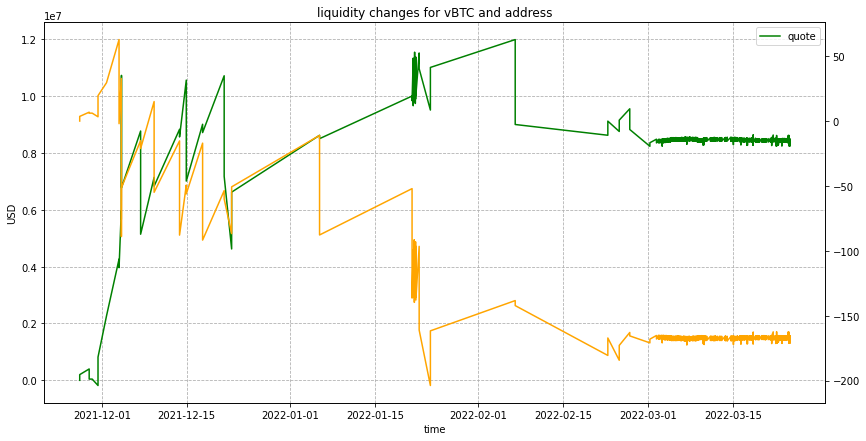

In [67]:
maker_liquidity = liquidity_changes_df[liquidity_changes_df["maker"] == "0x9c1e0c67aa30c063f341885b12cb81cc94613fc7"]
maker_pool_liquidity = maker_liquidity[maker_liquidity["pool_name"] == 'vBTC']
maker_pool_liquidity["quote_balance"] = maker_pool_liquidity["quote"].cumsum()
maker_pool_liquidity["base_balance"] = maker_pool_liquidity["base"].cumsum()

fig, ax = plt.subplots(figsize=(14, 7))
ax2 = ax.twinx()
ax.plot(maker_pool_liquidity["time"], maker_pool_liquidity["quote_balance"], color='g', label='quote')
ax2.plot(maker_pool_liquidity["time"], maker_pool_liquidity["base_balance"], color='orange', label='base')
ax.set_xlabel("time")
ax.set_ylabel("USD")
ax.legend()
ax.grid(True, linestyle='--')
ax.set_title("liquidity changes for vBTC and address")
plt.show()

In [68]:
liquidity_changes_df["liquidity_price"] = abs(liquidity_changes_df["quote"]) / abs(liquidity_changes_df["base"])
liquidity_changes_df[["maker", "base", "quote", "quote_fee", "time", "pool_name", "lower_bound", "upper_bound", "liquidity_price"]]

,maker,base,quote,quote_fee,time,pool_name,lower_bound,upper_bound,liquidity_price
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.000921,50.000000,0.000000,2021-11-27 08:16:25,vBTC,2.954278e-39,3.384921e+38,54295.708000
1,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.012181,50.000000,0.000000,2021-11-27 08:16:25,vETH,2.954278e-39,3.384921e+38,4104.856899
2,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,3.572179,200000.000000,0.000000,2021-11-27 08:16:25,vBTC,5.171263e+04,5.692287e+04,55988.228677
3,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,46.254982,200000.000000,0.000000,2021-11-27 08:16:25,vETH,3.895536e+03,4.313830e+03,4323.858591
4,0x35952141922ee99a04e016c967c3f0ad589ea958,0.100000,472.798469,0.000000,2021-11-27 09:06:32,vETH,3.990155e+03,4.288026e+03,4727.984690
...,...,...,...,...,...,...,...,...,...
130054,0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420,-1683.962836,0.000000,144.993911,2022-06-13 10:56:51,vAAVE,5.948926e+01,7.164952e+01,0.000000
130055,0x377e6326a8e2ce4a856d31605ca33505ad2b57b1,1435.815543,4999.462445,0.000000,2022-06-13 10:58:11,vAPE,3.478628e-01,3.487682e+01,3.481967
130056,0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420,1708.506923,0.000000,0.000000,2022-06-13 10:59:12,vAAVE,5.877969e+01,7.037143e+01,0.000000
130057,0x377e6326a8e2ce4a856d31605ca33505ad2b57b1,-331.643015,-4978.735548,2.235039,2022-06-13 11:03:18,vAVAX,1.512826e+00,1.516763e+02,15.012334


In [69]:
maker_liquidity = liquidity_changes_df[liquidity_changes_df["maker"] == "0x9c1e0c67aa30c063f341885b12cb81cc94613fc7"][
    ["maker", "timestamp", "base", "quote", "quote_fee", "time", "block_number", "pool_name", "lower_bound", "upper_bound", "liquidity_price"]]
maker_pool_liquidity = maker_liquidity[maker_liquidity["pool_name"] == 'vBTC']
maker_pool_liquidity["prev_liquidity_price"] = maker_pool_liquidity["liquidity_price"].shift(1)
maker_pool_liquidity["quote_balance"] = maker_pool_liquidity["quote"].cumsum()
maker_pool_liquidity["base_balance"] = maker_pool_liquidity["base"].cumsum()
maker_pool_liquidity["prev_base_balance"] = maker_pool_liquidity["base_balance"].shift(1)
maker_pool_liquidity["impermanent_loss"] = ((maker_pool_liquidity["prev_liquidity_price"] - 
                                             maker_pool_liquidity["liquidity_price"]) *
                                            maker_pool_liquidity["prev_base_balance"])
maker_pool_liquidity

,maker,timestamp,base,quote,quote_fee,time,block_number,pool_name,lower_bound,upper_bound,liquidity_price,prev_liquidity_price,quote_balance,base_balance,prev_base_balance,impermanent_loss
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1638000985,0.000921,50.000000,0.000000,2021-11-27 08:16:25,515552,vBTC,2.954278e-39,3.384921e+38,54295.708000,NaN,5.000000e+01,0.000921,NaN,NaN
2,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1638000985,3.572179,200000.000000,0.000000,2021-11-27 08:16:25,515555,vBTC,5.171263e+04,5.692287e+04,55988.228677,54295.708000,2.000500e+05,3.573100,0.000921,-1.558614e+00
22,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1638135861,3.255201,200000.000000,0.000000,2021-11-28 21:44:21,568711,vBTC,5.360810e+04,5.900932e+04,61440.143316,55988.228677,4.000500e+05,6.828301,3.573100,-1.948024e+04
23,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1638135861,-0.741848,-356571.425654,761.152618,2021-11-28 21:44:21,568721,vBTC,5.171263e+04,5.692287e+04,480652.762256,61440.143316,4.347857e+04,6.086453,6.828301,-2.862510e+06
34,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1638178819,-0.000896,-51.404771,0.006881,2021-11-29 09:40:19,582490,vBTC,2.954278e-39,3.384921e+38,57389.487648,480652.762256,4.342717e+04,6.085557,6.086453,2.576172e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17250,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1648112797,-0.001449,-62.354889,0.000000,2022-03-24 09:06:37,4787801,vBTC,3.317260e+04,5.590748e+04,43036.192447,43036.192447,8.246741e+06,-171.216966,-171.215517,2.317108e-07
17253,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1648112813,2.902825,124926.543699,0.000000,2022-03-24 09:06:53,4787814,vBTC,3.317260e+04,5.590748e+04,43036.192447,43036.192447,8.371667e+06,-168.314141,-171.216966,-2.304670e-07
17294,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1648114625,2.838812,125000.000000,0.000000,2022-03-24 09:37:05,4789248,vBTC,3.297417e+04,5.590748e+04,44032.507091,43036.192447,8.496667e+06,-165.475329,-168.314141,1.676938e+05
17295,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1648114640,-2.884910,-125698.570007,14.853304,2022-03-24 09:37:20,4789274,vBTC,3.317260e+04,5.590748e+04,43571.050057,44032.507091,8.370969e+06,-168.360239,-165.475329,-7.635975e+04


In [70]:
master_trader_df[master_trader_df["timestamp"].isin(liquidity_changes_df["timestamp"])]["swapped_price"].dropna()

45         4147.372165
47         4148.935121
48         4149.815678
49         4150.765768
50         4151.591441
              ...     
7221739       0.659030
7221741       0.653692
7221743       3.216396
7221745      15.161918
7221747       0.205490
Name: swapped_price, Length: 535219, dtype: float64

In [71]:
impermanent_losses = maker_pool_liquidity["impermanent_loss"].replace([np.inf, -np.inf], np.nan)
impermanent_losses = impermanent_losses.dropna()
impermanent_losses

2       -1.558614e+00
22      -1.948024e+04
23      -2.862510e+06
34       2.576172e+06
40      -1.413092e+05
             ...     
17250    2.317108e-07
17253   -2.304670e-07
17294    1.676938e+05
17295   -7.635975e+04
17399   -1.154218e+05
Name: impermanent_loss, Length: 870, dtype: float64

In [72]:
impermanent_losses_median = impermanent_losses.median()
impermanent_losses_std = impermanent_losses.std()

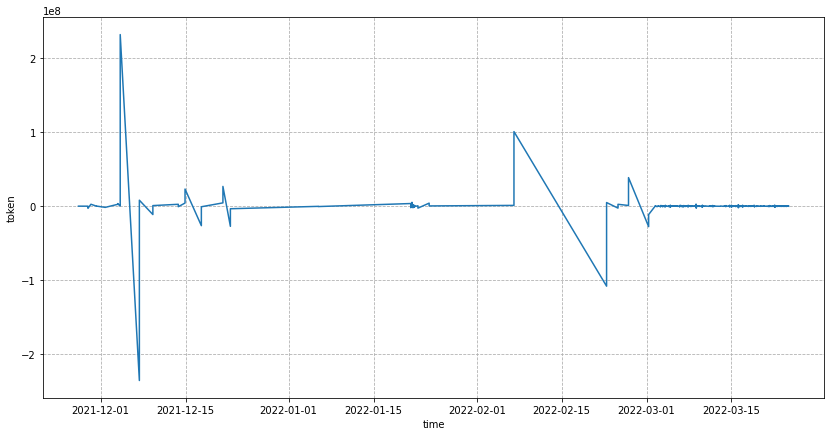

In [73]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(maker_pool_liquidity["time"], 
        maker_pool_liquidity["impermanent_loss"])
ax.set_xlabel("time")
ax.set_ylabel("token")
ax.grid(True, linestyle='--')
plt.show()

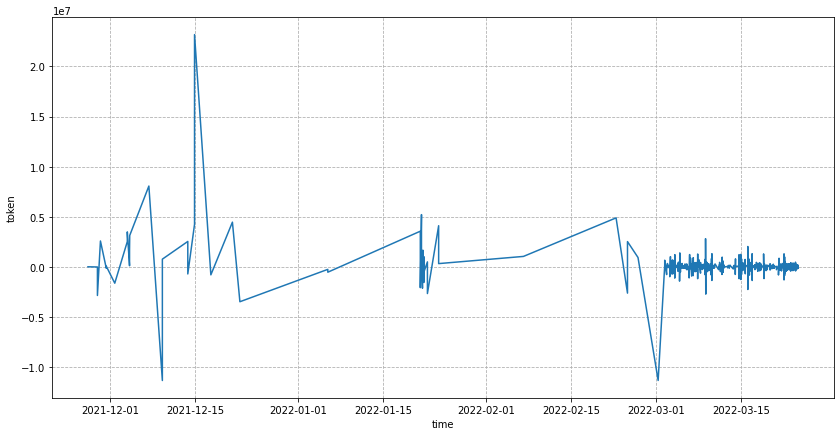

In [74]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(maker_pool_liquidity[(maker_pool_liquidity["impermanent_loss"] <= impermanent_losses_median + (2 * impermanent_losses_std)) &
                             (maker_pool_liquidity["impermanent_loss"] >= impermanent_losses_median - (2 * impermanent_losses_std))]["time"], 
        maker_pool_liquidity[(maker_pool_liquidity["impermanent_loss"] <= impermanent_losses_median + (2 * impermanent_losses_std)) &
                             (maker_pool_liquidity["impermanent_loss"] >= impermanent_losses_median - (2 * impermanent_losses_std))]["impermanent_loss"])
ax.set_xlabel("time")
ax.set_ylabel("token")
ax.grid(True, linestyle='--')
plt.show()

In [75]:
print("positive impermanent loss sum = " + str(maker_pool_liquidity[(maker_pool_liquidity["impermanent_loss"] >= 0) &
                                                                    (abs(maker_pool_liquidity["impermanent_loss"]) != np.inf)]["impermanent_loss"].sum()))
print("negative impermanent loss sum = " + str(maker_pool_liquidity[(maker_pool_liquidity["impermanent_loss"] < 0) &
                                                                    (abs(maker_pool_liquidity["impermanent_loss"]) != np.inf)]["impermanent_loss"].sum()))

positive impermanent loss sum = 569650407.3804954
negative impermanent loss sum = -558457460.7202128


In [76]:
master_trader_df.columns

Index(['trader', 'exchanged_position_size', 'exchanged_position_notional',
       'fee', 'open_notional', 'realized_pnl', 'position_size_after',
       'swapped_price', 'entry_price_after', 'market_price_after',
       'block_number_log_index', 'timestamp', 'time', 'pool_name',
       'funding_payment', 'mark_twap', 'index_twap', 'daily_funding_rate',
       'deposit', 'withdraw', 'liquidator', 'liquidation_fee',
       'position_size_abs', 'position_notional_abs', 'block_number'],
      dtype='object')

In [77]:
maker_pool_liquidity.columns

Index(['maker', 'timestamp', 'base', 'quote', 'quote_fee', 'time',
       'block_number', 'pool_name', 'lower_bound', 'upper_bound',
       'liquidity_price', 'prev_liquidity_price', 'quote_balance',
       'base_balance', 'prev_base_balance', 'impermanent_loss'],
      dtype='object')

In [83]:
master_trader_df[master_trader_df["block_number"].isin(maker_pool_liquidity["block_number"])]["swapped_price"]

Series([], Name: swapped_price, dtype: float64)

In [84]:
maker_pool_liquidity["swap_price"] = master_trader_df[master_trader_df["block_number"].isin(maker_pool_liquidity["block_number"].dropna())]["swapped_price"]
maker_pool_liquidity["prev_swap_price"] = maker_pool_liquidity["swap_price"].shift(1)
maker_pool_liquidity["impermanent_swap_loss"] = ((maker_pool_liquidity["prev_swap_price"] - 
                                                maker_pool_liquidity["swap_price"]) *
                                                maker_pool_liquidity["prev_base_balance"])

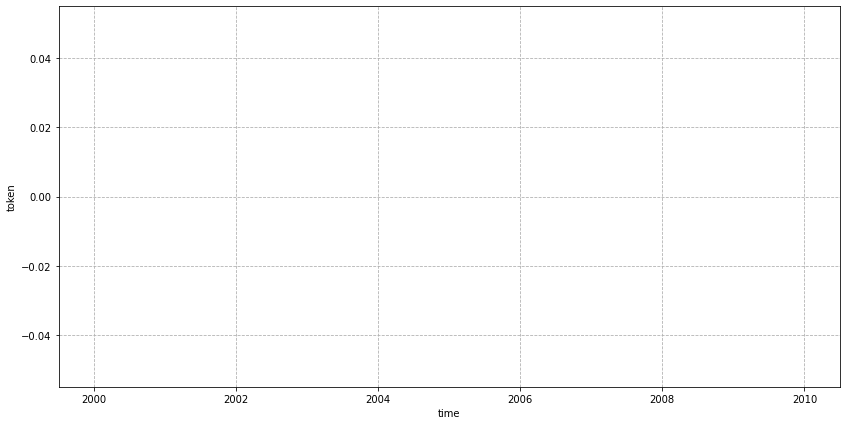

In [85]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(maker_pool_liquidity["time"], 
        maker_pool_liquidity["impermanent_swap_loss"])
ax.set_xlabel("time")
ax.set_ylabel("token")
ax.grid(True, linestyle='--')
plt.show()